In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
from scipy import *
import scipy
from scipy import stats
import tables
import h5py

#!jt -t onedork -cellw 90%

In [2]:
uscal=50
vscal=10
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

979200 bytes
[[ 2.          2.10769802  2.23144676 ... 15.99737424 16.01025277
  16.02247306]
 [ 1.95526997  2.05587226  2.17207373 ... 15.99116615 16.00436178
  16.01688324]
 [ 1.91053993  2.00377837  2.11206386 ... 15.98430563 15.9978515
  16.01070565]
 ...
 [ 0.06024401  0.53755707  0.558188   ...  0.56301109  0.56301109
   0.5630111 ]
 [ 0.06021034  0.53755707  0.558188   ...  0.56301109  0.56301109
   0.5630111 ]
 [ 0.06017674  0.53755707  0.558188   ...  0.56301109  0.56301109
   0.5630111 ]]
0.0
[2.52969829 2.45450047 2.37761677 ... 0.56345721 0.56345721 0.56345721]


In [5]:
print(rnputil)

M=massnp[0,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.5,1.3,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print('---')
print(M,Q,Lambda)
print('---')
print(rminus,rplus,rcosm)


['61168000' '61168' '1000' '2.0' '0.5' '1.0' '0.9' '0.01' 'True' '0.0'
 'edd']
N=61168000
---
1.000526724918024 0.9 0.01
---
0.5630467409865293 1.4543624626420946 16.24720508512007


In [6]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print('k+: '+str(kappaplus),'k-: '+str(kappaminus),'kc: '+str(kappacosm))
###double-check for Lambda=0
###kappaminus
#print(np.abs((M*rminus-Q**2)/rminus**3.0))
#print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

#print(kappaplus-kappacosm)


k+: 0.20486653209365185 k-: 1.3837225159034263 kc: 0.05055593443881179


In [7]:
uval=3
print(Nu)

1224


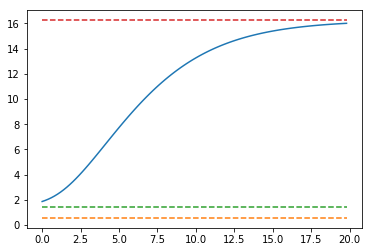

In [8]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rminus,rminus],'--')
plt.plot([min(vrange),max(vrange)],[rplus,rplus],'--')
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
#plt.ylim(rcosm-.0000001,rcosm+.0000001)
plt.show()

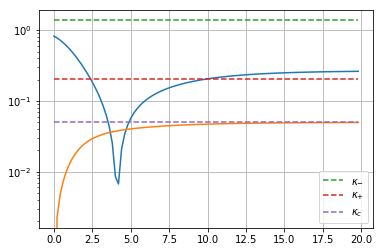

In [9]:
plt.plot(vrange,np.abs(dsignpv[uval]))
plt.plot(vrange,np.abs(dsignpu[uval]))
plt.plot([min(vrange),max(vrange)],[kappaminus,kappaminus],'--',label=r'$\kappa_{-}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label=r'$\kappa_{-}-\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
plt.plot([min(vrange),max(vrange)],[kappaplus,kappaplus],'--',label=r'$\kappa_{+}$')
plt.plot([min(vrange),max(vrange)],[kappacosm,kappacosm],'--',label=r'$\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaplus-kappacosm,kappaplus-kappacosm],'--',label=r'$\kappa_{c}$')
plt.yscale('log')
#plt.ylim(-.11,-.09)
plt.ylim()
plt.legend(loc='best')
plt.grid()
plt.show()

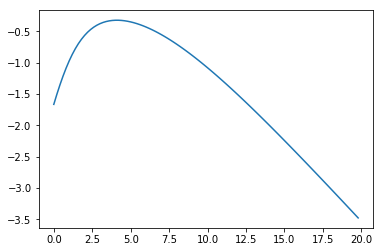

1224 100
[-0.03560042  0.56646393]


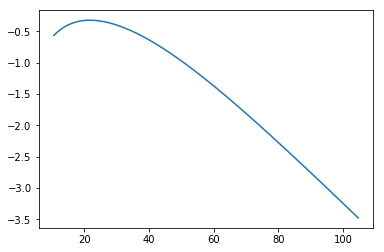

0.21893204302148203


In [10]:
plt.plot(vrange,signp[uval])
plt.show()
print(Nu,Nv)
vrange2=vrange*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
v1=10
v2=100
print(np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
plt.plot(vrange2[v1:v2],signp[uval][v1:v2])
plt.show()

print(np.abs(dsignpv[uval][int((v1+v2)/2)]))


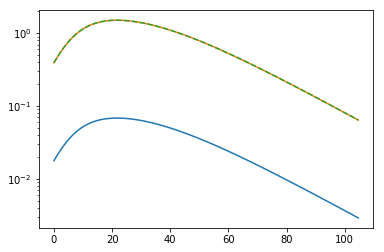

In [11]:
plt.plot(vrange2,np.abs(drnpu[uval]))
plt.plot(vrange2,drnpv[uval])
plt.plot(vrange2,np.abs(drnpv[uval]),'--')
plt.yscale('log')
plt.show()

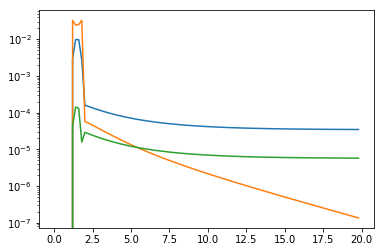

In [12]:
plt.plot(vrange,np.abs(phinp[uval]))
plt.plot(vrange,np.abs(dphinpv[uval]))
plt.plot(vrange,np.abs(dphinpu[uval]))
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


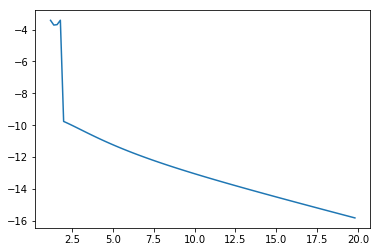

1224 100
0.05055593443881179


TypeError: expected non-empty vector for x

In [13]:
plt.plot(vrange,np.log(np.abs(dphinpv[uval])))
#plt.plot(vrange,dphinpv[0])
#plt.yscale('log')
plt.show()
print(Nu,Nv)
print(kappacosm)
v1=375
v2=400
print(np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2])))
plt.show()

In [ ]:
plt.plot(vrange,np.abs(massnp[uval]))
#plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.yscale('log')
plt.show()

v1=700
v2=800
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])))
plt.show()

In [ ]:
for i in range(int(Nu/10)):
    i2=10*i
    plt.plot(vrange,np.log(np.abs(np.exp(-signp[i2])*drnpv[i2])))
plt.show()


In [ ]:
uval2=-1
v1=400
v2=600
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])))
plt.show()

In [ ]:
print(massnp[0,-1])

In [ ]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
#print(dsignpv2)

In [ ]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

In [ ]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

In [ ]:
Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))

In [ ]:
plt.plot(vrange2,Rfunc)
plt.plot(vrange2,np.abs(Rfunc),'--')
plt.yscale('log')
plt.show()

In [ ]:
r2=1.56
print(1-Q**2.0/r2**2.0-Lambda*r2**2.0)

In [ ]:
print(urange)